<a href="https://colab.research.google.com/github/annacfisher/ds4002_project1/blob/main/SCRIPTS/3_VADER_and_Stat_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


Vader Code

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd


analyser = SentimentIntensityAnalyzer()

analyser.polarity_scores("I hate everything.")

{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}

Import Recruit File from Drive

Mounted at /content/drive


In [ ]:
file_path = '/content/Recruit_Data.csv'
df_recruit = pd.read_csv(file_path)
print(df_recruit.head())


            User        Full_Name  XOS_Rating                 High_School  \
0     MarteriusB  Boyd, Marterius         4.0  Lausanne Collegiate School   
1     MarteriusB  Boyd, Marterius         4.0  Lausanne Collegiate School   
2     MarteriusB  Boyd, Marterius         4.0  Lausanne Collegiate School   
3  BraytonAlford  Alford, Brayton         NaN                Carroll High   
4  BraytonAlford  Alford, Brayton         NaN                Carroll High   

  State                                              Tweet  
0    TN  Thankful to be recognized as a top prospect in...  
1    TN  After a great junior day visit in Tallahassee....  
2    TN  After a great conversation with @NastyWideOuts...  
3    IA  Fractured my foot this year but pushed through...  
4    IA  Iowa Football: Top Wide Receivers in 2026 http...  


Create a function that adds columns of the Vader output

In [ ]:
df_recruit['sentiment_scores'] = df_recruit['Tweet'].apply(lambda x: analyser.polarity_scores(str(x)))

# Extracting specific sentiment scores (optional)
df_recruit['compound'] = df_recruit['sentiment_scores'].apply(lambda x: x['compound'])
df_recruit['pos'] = df_recruit['sentiment_scores'].apply(lambda x: x['pos'])
df_recruit['neu'] = df_recruit['sentiment_scores'].apply(lambda x: x['neu'])
df_recruit['neg'] = df_recruit['sentiment_scores'].apply(lambda x: x['neg'])

In [ ]:
print(df_recruit.head())

#export this dataframe for analysis
df_recruit.to_csv("Recruit_Data_for_Analysis", index=False)


            User        Full_Name  XOS_Rating                 High_School  \
0     MarteriusB  Boyd, Marterius         4.0  Lausanne Collegiate School   
1     MarteriusB  Boyd, Marterius         4.0  Lausanne Collegiate School   
2     MarteriusB  Boyd, Marterius         4.0  Lausanne Collegiate School   
3  BraytonAlford  Alford, Brayton         NaN                Carroll High   
4  BraytonAlford  Alford, Brayton         NaN                Carroll High   

  State                                              Tweet  \
0    TN  Thankful to be recognized as a top prospect in...   
1    TN  After a great junior day visit in Tallahassee....   
2    TN  After a great conversation with @NastyWideOuts...   
3    IA  Fractured my foot this year but pushed through...   
4    IA  Iowa Football: Top Wide Receivers in 2026 http...   

                                    sentiment_scores  compound    pos    neu  \
0  {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...    0.7901  0.500  0.500   
1  {

Import Established Players File from Drive

In [ ]:
est_file_path = '/content/Established_Data.csv'
est_df = pd.read_csv(est_file_path)
print(est_df.head())

     Full_Name         User                                              Tweet
0  Perry Jones  @supe_jones  @supe_jones: RT @CoachMikeLondon: FYI  Recruit...
1  Perry Jones  @supe_jones  @supe_jones: @Dyrell_Roberts @Therapyquotes_ A...
2  Perry Jones  @supe_jones  @supe_jones: RT @Dyrell_Roberts: FEBRUARY 2️⃣0...
3  Perry Jones  @supe_jones  @supe_jones: Looking for Virginia’s best! http...
4  Perry Jones  @supe_jones  Delaware! I’m excited to meet and talk with so...


Apply Vader to the Established Players File

In [ ]:
est_df['sentiment_scores'] = est_df['Tweet'].apply(lambda x: analyser.polarity_scores(str(x)))

# Extracting specific sentiment scores (optional)
est_df['compound'] = est_df['sentiment_scores'].apply(lambda x: x['compound'])
est_df['pos'] = est_df['sentiment_scores'].apply(lambda x: x['pos'])
est_df['neu'] = est_df['sentiment_scores'].apply(lambda x: x['neu'])
est_df['neg'] = est_df['sentiment_scores'].apply(lambda x: x['neg'])

In [ ]:
print(est_df.head())

est_df.to_csv("Established_Data_for_Analysis", index=False)

     Full_Name         User  \
0  Perry Jones  @supe_jones   
1  Perry Jones  @supe_jones   
2  Perry Jones  @supe_jones   
3  Perry Jones  @supe_jones   
4  Perry Jones  @supe_jones   

                                               Tweet  \
0  @supe_jones: RT @CoachMikeLondon: FYI  Recruit...   
1  @supe_jones: @Dyrell_Roberts @Therapyquotes_ A...   
2  @supe_jones: RT @Dyrell_Roberts: FEBRUARY 2️⃣0...   
3  @supe_jones: Looking for Virginia’s best! http...   
4  Delaware! I’m excited to meet and talk with so...   

                                    sentiment_scores  compound    pos    neu  \
0  {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp...    0.3680  0.144  0.856   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  0.000  1.000   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  0.000  1.000   
3  {'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'comp...    0.6696  0.473  0.527   
4  {'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...    0.7081  0.348  0.652

Compare Summary Statistics

In [ ]:
print("Summary Statistics for df:")
print(df_recruit[['compound', 'pos', 'neu', 'neg']].describe())

print("\nSummary Statistics for est_df:")
print(est_df[['compound', 'pos', 'neu', 'neg']].describe())


Summary Statistics for df:
         compound         pos         neu         neg
count  168.000000  168.000000  168.000000  168.000000
mean     0.485768    0.209083    0.776065    0.014857
std      0.363021    0.164513    0.166281    0.054118
min     -0.569600    0.000000    0.233000    0.000000
25%      0.242950    0.086750    0.666250    0.000000
50%      0.599400    0.205000    0.777500    0.000000
75%      0.791675    0.313500    0.903000    0.000000
max      0.975900    0.767000    1.000000    0.445000

Summary Statistics for est_df:
        compound        pos        neu        neg
count  80.000000  80.000000  80.000000  80.000000
mean    0.279214   0.158162   0.801275   0.040563
std     0.413524   0.162652   0.170712   0.077290
min    -0.804700   0.000000   0.428000   0.000000
25%     0.000000   0.000000   0.664250   0.000000
50%     0.348050   0.141000   0.817500   0.000000
75%     0.639825   0.289500   1.000000   0.040500
max     0.986000   0.572000   1.000000   0.310000


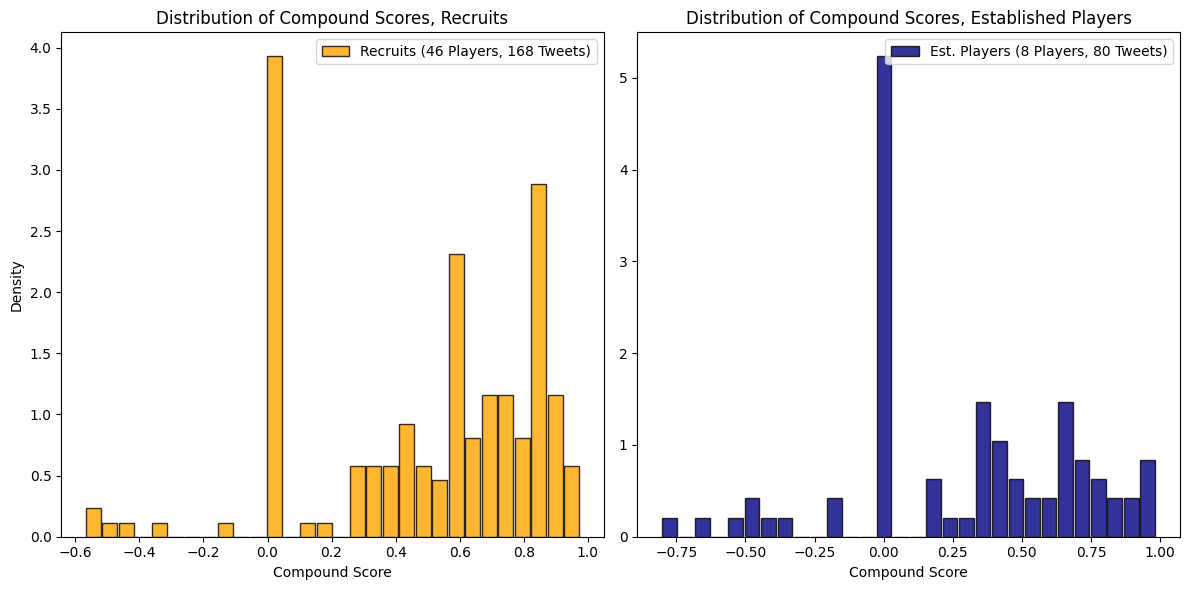

In [ ]:
## This code below provides the total number of tweets for each dataset (est vs recruits).
## Creates two  side-by-side histograms (one for recruits, one for established players) of their compound scores.
## Looks at the density, not the raw count for each, as the sample size is different for the two!

import matplotlib.pyplot as plt

n_est_players = len(est_df['compound'])
n_recruits = len(df_recruit['compound'])

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Left plot for the recruits
axes[0].hist(df_recruit['compound'],
             bins=30,
             color='orange',
             alpha=0.8,
             edgecolor='black',
             rwidth=0.9,
             density=True,  # raw counts
             label=f'Recruits (46 Players, {n_recruits} Tweets)')
axes[0].set_title('Distribution of Compound Scores, Recruits')
axes[0].set_xlabel('Compound Score')
axes[0].set_ylabel('Density')
axes[0].legend()

# Right plot for established players
axes[1].hist(est_df['compound'],
             bins=30,
             color='navy',
             alpha=0.8,
             edgecolor='black',
             rwidth=0.9,
             density=True,  # raw counts
             label=f'Est. Players (8 Players, {n_est_players} Tweets)')
axes[1].set_title('Distribution of Compound Scores, Established Players')
axes[1].set_xlabel('Compound Score')
axes[1].legend()

plt.tight_layout()
plt.show()

Compare Histograms on the same plot

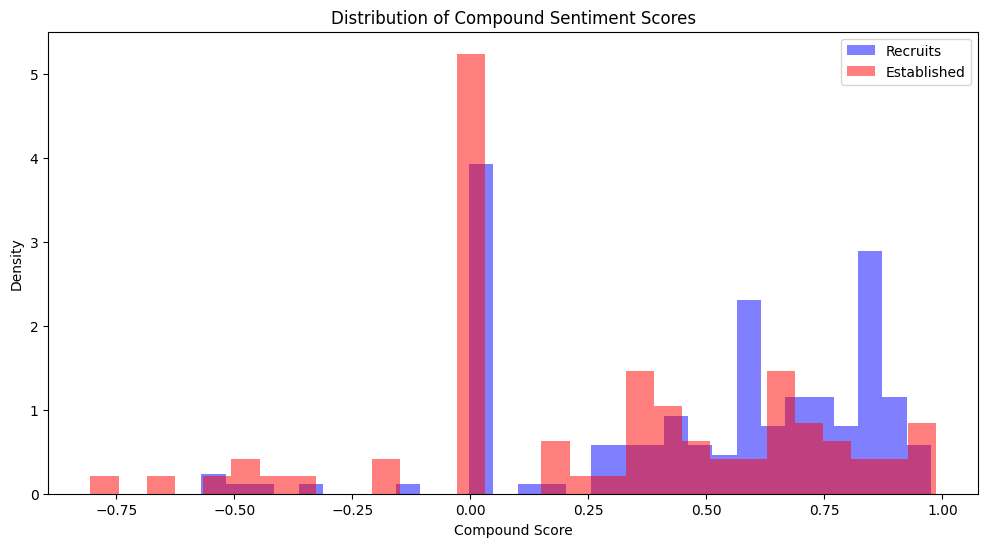

In [ ]:
import matplotlib.pyplot as plt

# Plot compound score distributions
plt.figure(figsize=(12, 6))
plt.hist(df_recruit['compound'], bins=30, alpha=0.5, label='Recruits', color='blue', density=True)
plt.hist(est_df['compound'], bins=30, alpha=0.5, label='Established', color='red', density=True)
plt.legend()
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Density')
plt.show()


Check for normality to undergo T-test

<ipython-input-11-dd0294531111>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_recruit['compound'], label='Recruits', shade=True, color='blue')
<ipython-input-11-dd0294531111>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(est_df['compound'], label='Established', shade=True, color='red')


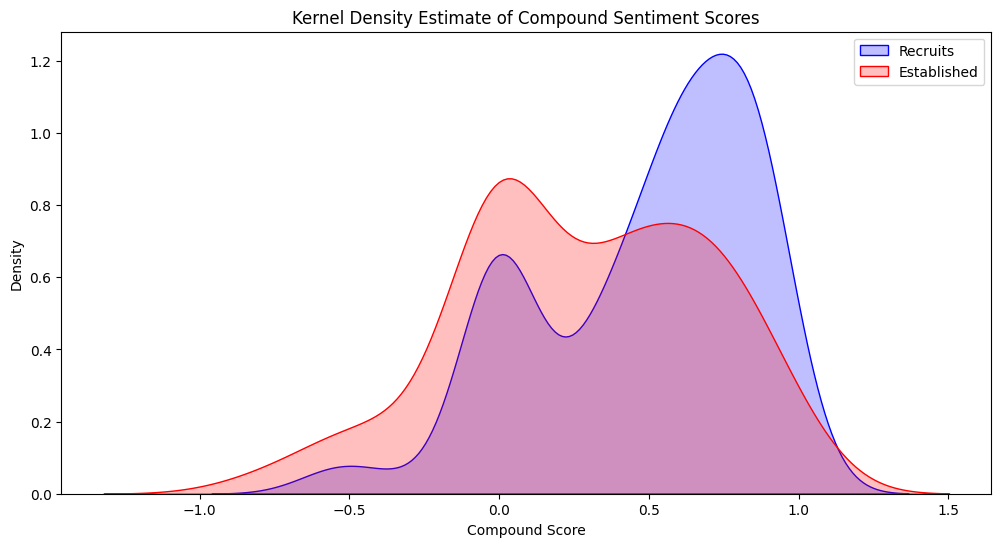

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.kdeplot(df_recruit['compound'], label='Recruits', shade=True, color='blue')
sns.kdeplot(est_df['compound'], label='Established', shade=True, color='red')
plt.title('Kernel Density Estimate of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
from scipy.stats import shapiro

# Check normality for df (high school recruits)
shapiro_df = shapiro(df_recruit['compound'])
print(f"Shapiro-Wilk test for df: Statistic={shapiro_df.statistic}, p-value={shapiro_df.pvalue}")

# Check normality for est_df (gritty college players)
shapiro_est_df = shapiro(est_df['compound'])
print(f"Shapiro-Wilk test for est_df: Statistic={shapiro_est_df.statistic}, p-value={shapiro_est_df.pvalue}")


Shapiro-Wilk test for df: Statistic=0.8964371574515103, p-value=1.8351494985879236e-09
Shapiro-Wilk test for est_df: Statistic=0.9483721334615888, p-value=0.002784529858455138


Based on results from the Density Plot and the Shapiro-Wilk test. We have statistical evidence that our data is not normally distributed. Therefore, we will not use a T-test, but rather conduct a Mann-Whitney U test instead.

In [ ]:
from scipy.stats import mannwhitneyu

mw_stat, mw_pval = mannwhitneyu(est_df['compound'], df_recruit['compound'])
print(f"Mann-Whitney U test: Statistic={mw_stat}, P-value={mw_pval}")


Mann-Whitney U test: Statistic=4790.0, P-value=0.00023428929963000372


Based on our results from the Mann-Whitney U Test. There is significant statistical evidence that established gritty players have a differing compound vader score than that of incoming recruits. Therefore, the compound vader score could be used as an indicator of recruits grit.

Run the tests for positive sentiment

<ipython-input-14-c99d3c67b4ed>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_recruit['pos'], label='Recruits', shade=True, color='blue')
<ipython-input-14-c99d3c67b4ed>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(est_df['pos'], label='Established', shade=True, color='red')


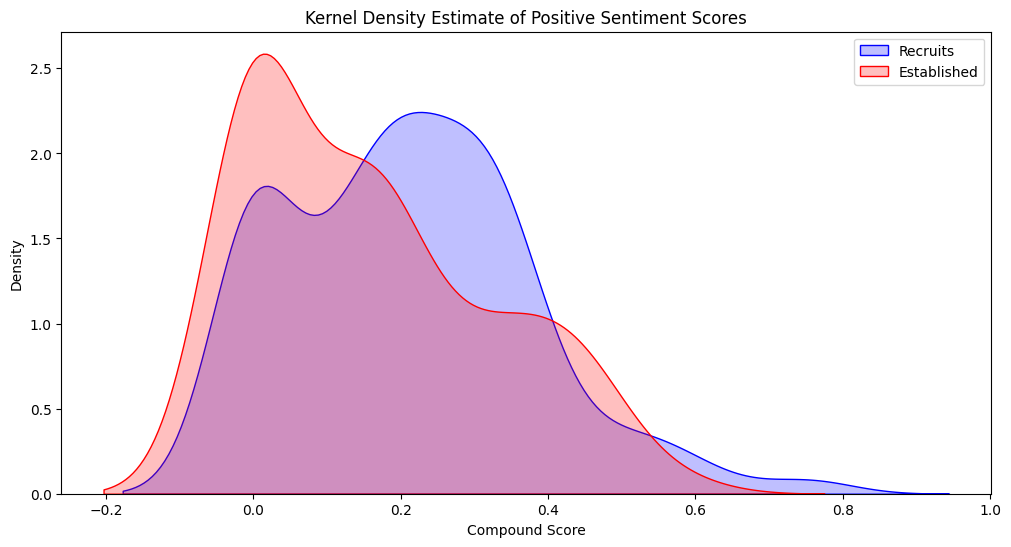

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.kdeplot(df_recruit['pos'], label='Recruits', shade=True, color='blue')
sns.kdeplot(est_df['pos'], label='Established', shade=True, color='red')
plt.title('Kernel Density Estimate of Positive Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
from scipy.stats import shapiro

# Check normality for df (high school recruits)
shapiro_df = shapiro(df_recruit['pos'])
print(f"Shapiro-Wilk test for df: Statistic={shapiro_df.statistic}, p-value={shapiro_df.pvalue}")

# Check normality for est_df (gritty college players)
shapiro_est_df = shapiro(est_df['pos'])
print(f"Shapiro-Wilk test for est_df: Statistic={shapiro_est_df.statistic}, p-value={shapiro_est_df.pvalue}")


Shapiro-Wilk test for df: Statistic=0.9325670263265221, p-value=4.3273572213550943e-07
Shapiro-Wilk test for est_df: Statistic=0.8592710821409469, p-value=3.359658364805142e-07


In [ ]:
from scipy.stats import mannwhitneyu

mw_stat, mw_pval = mannwhitneyu(est_df['pos'], df_recruit['pos'])
print(f"Mann-Whitney U test: Statistic={mw_stat}, P-value={mw_pval}")

Mann-Whitney U test: Statistic=5478.0, P-value=0.017414963399281273


Run the test for neutral sentiment

<ipython-input-17-3662f3f997cb>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_recruit['neu'], label='Recruits', shade=True, color='blue')
<ipython-input-17-3662f3f997cb>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(est_df['neu'], label='Established', shade=True, color='red')


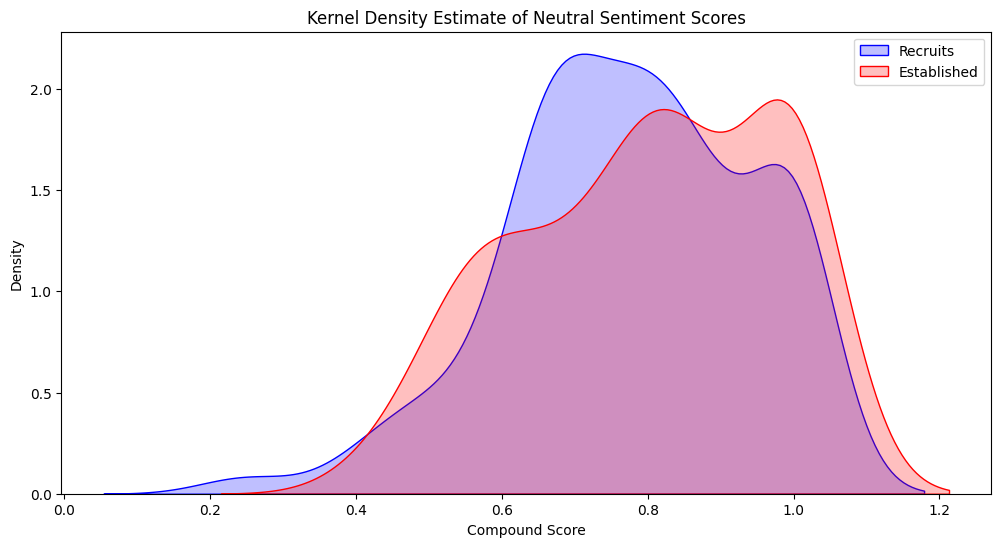

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df_recruit['neu'], label='Recruits', shade=True, color='blue')
sns.kdeplot(est_df['neu'], label='Established', shade=True, color='red')
plt.title('Kernel Density Estimate of Neutral Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
# Check normality for df (high school recruits)
shapiro_df = shapiro(df_recruit['neu'])
print(f"Shapiro-Wilk test for df: Statistic={shapiro_df.statistic}, p-value={shapiro_df.pvalue}")

# Check normality for est_df (gritty college players)
shapiro_est_df = shapiro(est_df['neu'])
print(f"Shapiro-Wilk test for est_df: Statistic={shapiro_est_df.statistic}, p-value={shapiro_est_df.pvalue}")


Shapiro-Wilk test for df: Statistic=0.9456021948030798, p-value=4.708812722252981e-06
Shapiro-Wilk test for est_df: Statistic=0.9060687402236055, p-value=2.21806453196289e-05


In [ ]:
mw_stat, mw_pval = mannwhitneyu(est_df['neu'], df_recruit['neu'])
print(f"Mann-Whitney U test: Statistic={mw_stat}, P-value={mw_pval}")

Mann-Whitney U test: Statistic=7275.0, P-value=0.2906025112426016


Run the test for negative sentiment

<ipython-input-20-173e715fda2c>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_recruit['neg'], label='Recruits', shade=True, color='blue')
<ipython-input-20-173e715fda2c>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(est_df['neg'], label='Established', shade=True, color='red')


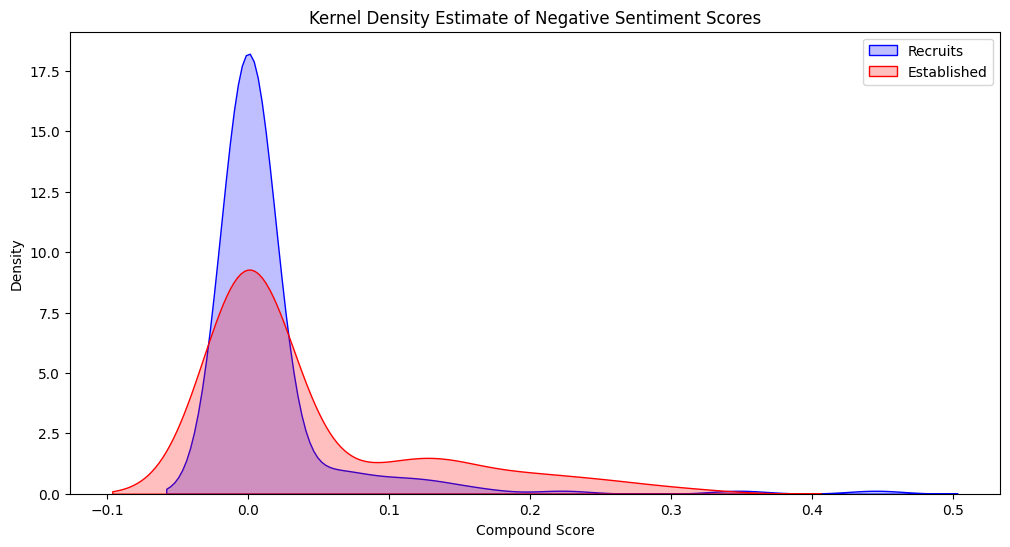

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df_recruit['neg'], label='Recruits', shade=True, color='blue')
sns.kdeplot(est_df['neg'], label='Established', shade=True, color='red')
plt.title('Kernel Density Estimate of Negative Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
# Check normality for df (high school recruits)
shapiro_df = shapiro(df_recruit['neg'])
print(f"Shapiro-Wilk test for df: Statistic={shapiro_df.statistic}, p-value={shapiro_df.pvalue}")

# Check normality for est_df (gritty college players)
shapiro_est_df = shapiro(est_df['neg'])
print(f"Shapiro-Wilk test for est_df: Statistic={shapiro_est_df.statistic}, p-value={shapiro_est_df.pvalue}")


Shapiro-Wilk test for df: Statistic=0.3076246023710135, p-value=7.190950247730347e-25
Shapiro-Wilk test for est_df: Statistic=0.594409062044344, p-value=1.5659380442044962e-13


In [ ]:
mw_stat, mw_pval = mannwhitneyu(est_df['neg'], df_recruit['neg'])
print(f"Mann-Whitney U test: Statistic={mw_stat}, P-value={mw_pval}")

Mann-Whitney U test: Statistic=7788.0, P-value=0.0015948518997472066


Using Cliff's delta to quantify the size of the difference

In [ ]:
!pip install cliffs-delta


In [ ]:
from cliffs_delta import cliffs_delta

delta, interpretation = cliffs_delta(df_recruit['compound'], est_df['compound'])
print(f"Cliff’s Delta for Compound Score: {delta}, Interpretation: {interpretation}")

delta, interpretation = cliffs_delta(df_recruit['pos'], est_df['pos'])
print(f"Cliff’s Delta for Positive Sentiment: {delta}, Interpretation: {interpretation}")

delta, interpretation = cliffs_delta(df_recruit['neg'], est_df['neg'])
print(f"Cliff’s Delta for Negative Sentiment: {delta}, Interpretation: {interpretation}")


delta, interpretation = cliffs_delta(df_recruit['neu'], est_df['neu'])
print(f"Cliff’s Delta for Neutral Sentiment: {delta}, Interpretation: {interpretation}")



Cliff’s Delta for Compound Score: 0.28720238095238093, Interpretation: small
Cliff’s Delta for Positive Sentiment: 0.18482142857142858, Interpretation: small
Cliff’s Delta for Negative Sentiment: -0.15892857142857142, Interpretation: small
Cliff’s Delta for Neutral Sentiment: -0.08258928571428571, Interpretation: negligible


Finding benchmark to use:

Based on Mann-Whitney test and Cliff's delta, compound scores have the greatest difference. Thus, we're going to use compound scores to classify players as gritty.

In [ ]:
#Finding and comparing the means of both recruits and established players

print(df_recruit['compound'].mean())
print((est_df["compound"].mean()))

0.4857678571428572
0.27921375


In [ ]:
import numpy as np

In [ ]:
#finding the standard error of the mean to provide a range for the scores

scores = est_df["compound"]

mean_score = np.mean(est_df['compound'])
sem = np.std(scores) / np.sqrt(len(scores))


In [ ]:
print (mean_score)

0.27921375


In [ ]:
print(sem)

0.04594350786372562


In [ ]:
#create range of scores
#confidence interval at 95% level
range_mean = [mean_score-1.96*sem, mean_score + 1.96*sem]

In [ ]:
print(range_mean)

[0.1891644745870978, 0.3692630254129022]


In [ ]:
#classify players as within the range of the mean or outside - code with help of Copilot

lower_bound = 0.18916
upper_bound = 0.369263

# Grouping scores by username

user_scores = {} #list of scores grouped by username
for index, entry in df_recruit.iterrows(): #for each index and entry in the recruit database
    username = entry["User"] #get the username of the player
    score = entry["compound"] #get the score associated with that entry
    if username not in user_scores:
        user_scores[username] = [] #if the username isn't in userscores yet, add it
    user_scores[username].append(score) #append the score to the username

# Calculating mean scores and checking if they fall within the range
user_mean_scores = {}
usernames_within_range = [] #list of usernames of players that are within range
for username, scores in user_scores.items(): #for each username and score within userscores
    mean_score = np.mean(scores) #get the mean
    user_mean_scores[username] = mean_score #get the username associated with the score
    if lower_bound <= mean_score <= upper_bound:
        usernames_within_range.append(username) #if within the range, append to list

In [ ]:
print(usernames_within_range)

['BraytonAlford', '__GoDJ__', 'ElijahByers18', 'JayceBrennen4', 'mario2rawwrio', 'titusandrus2', 'tylerbellQB', 'DereonAlbert50', 'JamariDj', 'DiaBell3QB1', 'Abaxter2026', 'JahmirCamp15151']


In [ ]:
#Get list of full names from usernames

full_names_within_range={}

for index, entry in df_recruit.iterrows():
    username = entry["User"] #get the username of the player
    full_name = entry["Full_Name"] #get the score associated with that entry
    if username in usernames_within_range:
        full_names_within_range[full_name] = [] #if the username isn't in userscores yet, add it
    #full_names_within_range[username].append(score) #append the score to the username

In [ ]:
print(full_names_within_range)

print(len(full_names_within_range))

{'Alford, Brayton': [], 'Bordeaux, DJ "GoDJ"': [], 'Byers, Elijah': [], 'Brennen, Jayce': [], 'Anderson, Mario': [], 'Andrus, Titus': [], 'Bell, Tyler': [], 'Albert, Dereon "Da"': [], 'Brown, Jamari': [], 'Bell, Dia "D"': [], 'Baxter, Anthony': [], 'Campfield, Jahmir': []}
12


Conduct final ANOVA analysis

In [ ]:
from scipy import stats

In [ ]:
#format for anova by replacing NANs with "No Score"

df_recruit['Star_level'] = df_recruit['XOS_Rating'].fillna('No Score')
df_recruit.head()

,User,Full_Name,XOS_Rating,High_School,State,Tweet,sentiment_scores,compound,pos,neu,neg,Star_level
0,MarteriusB,"Boyd, Marterius",4.0,Lausanne Collegiate School,TN,Thankful to be recognized as a top prospect in...,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",0.7901,0.500,0.500,0.0,4.0
1,MarteriusB,"Boyd, Marterius",4.0,Lausanne Collegiate School,TN,After a great junior day visit in Tallahassee....,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.8402,0.333,0.667,0.0,4.0
2,MarteriusB,"Boyd, Marterius",4.0,Lausanne Collegiate School,TN,After a great conversation with @NastyWideOuts...,"{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'comp...",0.8402,0.381,0.619,0.0,4.0
3,BraytonAlford,"Alford, Brayton",NaN,Carroll High,IA,Fractured my foot this year but pushed through...,"{'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...",0.7777,0.228,0.772,0.0,No Score
4,BraytonAlford,"Alford, Brayton",NaN,Carroll High,IA,Iowa Football: Top Wide Receivers in 2026 http...,"{'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'comp...",0.2023,0.205,0.795,0.0,No Score


In [ ]:
df_recruit['Star_level'] = df_recruit['Star_level'].astype(str)

In [ ]:
#check how many tweets fall under each star
df_recruit['Star_level'].value_counts()

,count
Star_level,
2.5,57
No Score,15
2.0,14
3.0,14
4.5,14
5.0,13
3.5,12
4.0,11
1.0,9


In [ ]:
#perform anova on compound scores

#create groups for analysis - differing XOS star levels
group_1 = df_recruit[df_recruit['Star_level'] == '1.0']['compound']
group_1_5 = df_recruit[df_recruit['Star_level'] == '1.5']['compound']
group_2 = df_recruit[df_recruit['Star_level'] == '2.0']['compound']
group_2_5 = df_recruit[df_recruit['Star_level'] == '2.5']['compound']
group_3 = df_recruit[df_recruit['Star_level'] == '3.0']['compound']
group_3_5 = df_recruit[df_recruit['Star_level'] == '3.5']['compound']
group_4 = df_recruit[df_recruit['Star_level'] == '4.0']['compound']
group_4_5 = df_recruit[df_recruit['Star_level'] == '4.5']['compound']
group_5 = df_recruit[df_recruit['Star_level'] == '5.0']['compound']
group_none = df_recruit[df_recruit['Star_level'] == 'No Score']['compound']


In [ ]:
# conduct ANOVA test using stats function

f_statistic, p_value = stats.f_oneway(group_1, group_1_5,group_2, group_2_5, group_3, group_3_5, group_4, group_4_5, group_5, group_none)
print(f'F-statistic: {f_statistic}, P-value: {p_value}')

F-statistic: 0.9798824678586281, P-value: 0.458791958120745


Not a significant p-value, so there's no evidence of any difference in compound sentiment scores across star levels.

In [ ]:
#check if there's a difference between star and no-star athletes

#group based on presence of XOS star or not
group_score = df_recruit[df_recruit['Star_level'] != 'No Score']['compound']
group_none = df_recruit[df_recruit['Star_level'] == 'No Score']['compound']

In [ ]:
#two sided t-test to check for significant difference between the means of the two groups

t_statistic, p_value = stats.ttest_ind(group_score, group_none)
print(f'T-statistic: {t_statistic}, P-value: {p_value}')


T-statistic: 0.2448980141095571, P-value: 0.8068378713379611


No significance, so there's no evidence that a star or no star rating has an effect on compound sentiment.

In [ ]:
print(group_score)

0      0.7901
1      0.8402
2      0.8402
15     0.6369
16     0.8555
        ...  
163    0.7506
164    0.3400
165    0.2924
166    0.5399
167    0.6688
Name: compound, Length: 153, dtype: float64


<ipython-input-60-e1ffa5faaa42>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_score, label='Star', shade=True, color='blue')
<ipython-input-60-e1ffa5faaa42>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(group_none, label='No Score', shade=True, color='red')


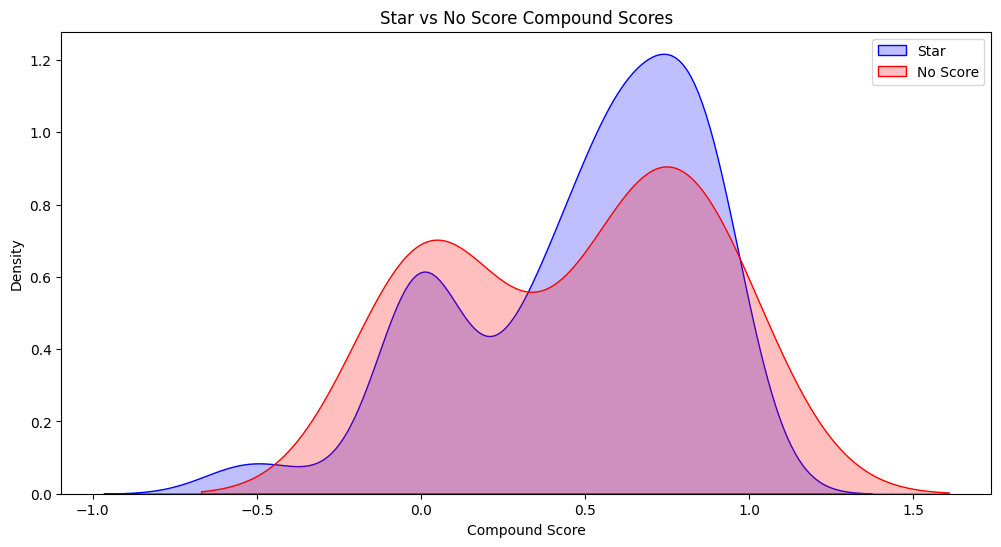

In [ ]:
#plot scores vs no scores

plt.figure(figsize=(12, 6))
sns.kdeplot(group_score, label='Star', shade=True, color='blue')
sns.kdeplot(group_none, label='No Score', shade=True, color='red')
plt.title('Star vs No Score Compound Scores')
plt.xlabel('Compound Score')
plt.ylabel('Density')
plt.legend()
plt.show()

Showing very similar distributions, so it doesn't seem like sentiment differs between athletes rated by the XOS star system and athletes not rated.